In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/face-expression-recognition-dataset/images/validation/surprise/13288.jpg
/kaggle/input/face-expression-recognition-dataset/images/validation/surprise/24201.jpg
/kaggle/input/face-expression-recognition-dataset/images/validation/surprise/26556.jpg
/kaggle/input/face-expression-recognition-dataset/images/validation/surprise/26076.jpg
/kaggle/input/face-expression-recognition-dataset/images/validation/surprise/27577.jpg
/kaggle/input/face-expression-recognition-dataset/images/validation/surprise/27973.jpg
/kaggle/input/face-expression-recognition-dataset/images/validation/surprise/26452.jpg
/kaggle/input/face-expression-recognition-dataset/images/validation/surprise/10162.jpg
/kaggle/input/face-expression-recognition-dataset/images/validation/surprise/12768.jpg
/kaggle/input/face-expression-recognition-dataset/images/validation/surprise/12551.jpg
/kaggle/input/face-expression-recognition-dataset/images/validation/surprise/13205.jpg
/kaggle/input/face-expression-recognition-d

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import tensorflow as tf

In [3]:
from keras.utils import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [4]:
picture_size = 48
folder_path = "/kaggle/input/face-expression-recognition-dataset/images/"

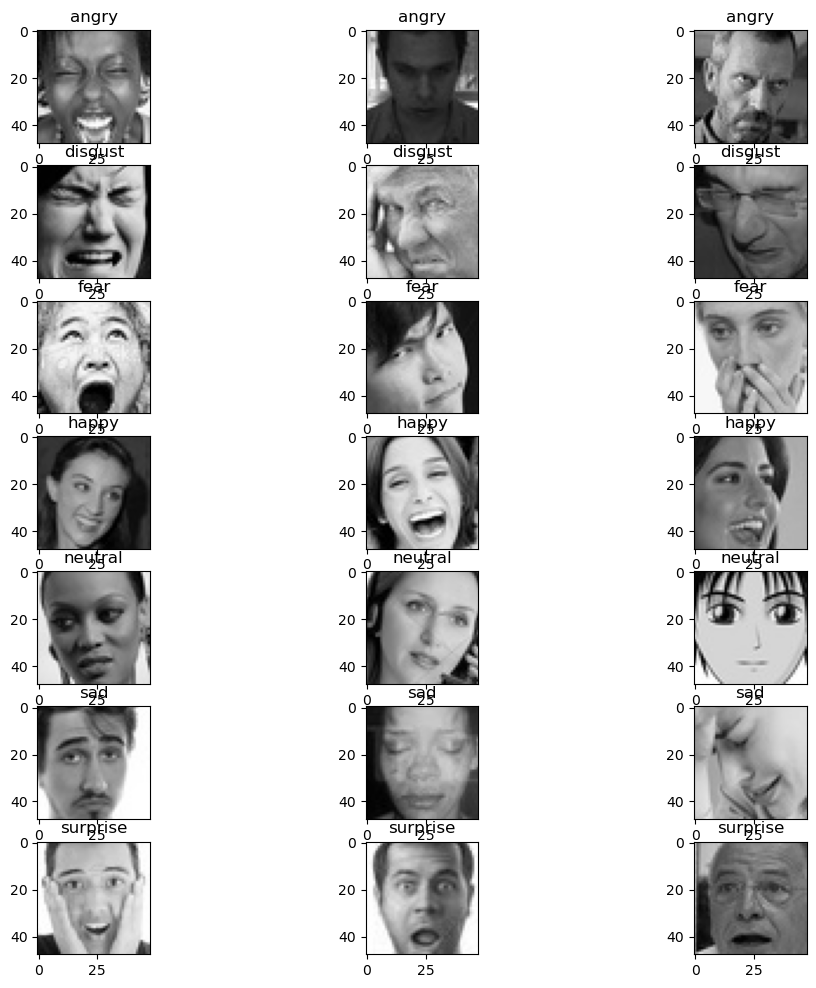

In [5]:


expression = ['angry','disgust','fear','happy','neutral','sad','surprise']
picture_size = 48

# Create a figure with 7 rows and 3 columns
fig, axes = plt.subplots(7, 3, figsize=(12,12))

# Loop over the expressions
for i, exp in enumerate(expression):
    # Loop over the images for the current expression
    for j in range(3):
        # Plot the image
        axes[i,j].imshow(load_img(folder_path+"train/"+exp+"/"+
                                 os.listdir(folder_path+"train/"+exp)[j], target_size=(picture_size, picture_size)))
        axes[i,j].set_title(exp)

plt.show()


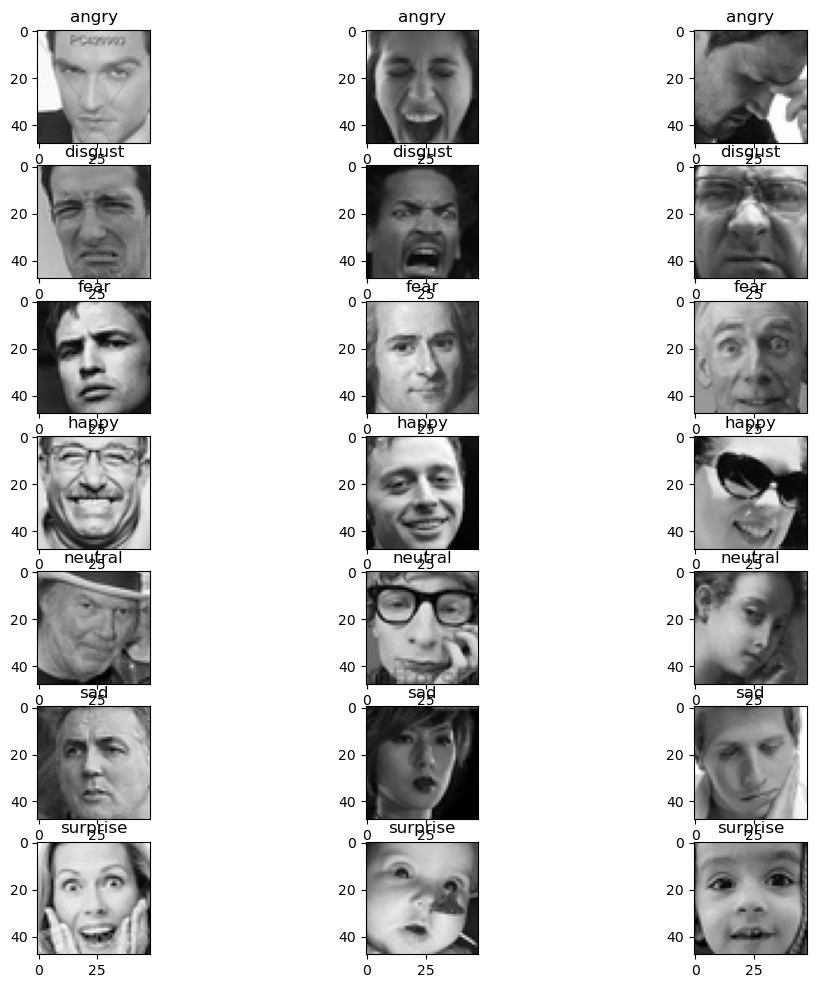

In [6]:
fig, axes = plt.subplots(7, 3, figsize=(12,12))

# Loop over the expressions
for i, exp in enumerate(expression):
    # Loop over the images for the current expression
    for j in range(3):
        # Plot the image
        axes[i,j].imshow(load_img(folder_path+"validation/"+exp+"/"+
                                 os.listdir(folder_path+"validation/"+exp)[j], target_size=(picture_size, picture_size)))
        axes[i,j].set_title(exp)

plt.show()

In [7]:
expression = ['angry','disgust','fear','happy','neutral','sad','surprise']

# Initialize a dictionary to store the number of pictures in each folder
picture_count = {}
# total = len(os.listdir(folder_path+"train/"))
# print("length of dataset is",total)
# Loop over the expressions
for exp in expression:
    # Get the number of pictures in the current folder
    picture_count[exp] = len(os.listdir(folder_path+"train/"+exp))

# Print the number of pictures in each folder
for exp, count in picture_count.items():
    print("Expression:", exp, "Number of pictures:", count)

Expression: angry Number of pictures: 3993
Expression: disgust Number of pictures: 436
Expression: fear Number of pictures: 4103
Expression: happy Number of pictures: 7164
Expression: neutral Number of pictures: 4982
Expression: sad Number of pictures: 4938
Expression: surprise Number of pictures: 3205


In [8]:
expression = ['angry','disgust','fear','happy','neutral','sad','surprise']

# Initialize a dictionary to store the number of pictures in each folder
picture_count = {}

# Loop over the expressions
for exp in expression:
    # Get the number of pictures in the current folder
    picture_count[exp] = len(os.listdir(folder_path+"validation/"+exp))

# Print the number of pictures in each folder
for exp, count in picture_count.items():
    print("Expression:", exp, "Number of pictures:", count)

Expression: angry Number of pictures: 960
Expression: disgust Number of pictures: 111
Expression: fear Number of pictures: 1018
Expression: happy Number of pictures: 1825
Expression: neutral Number of pictures: 1216
Expression: sad Number of pictures: 1139
Expression: surprise Number of pictures: 797


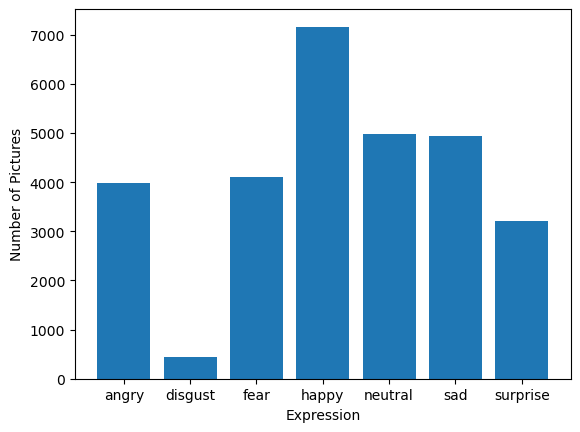

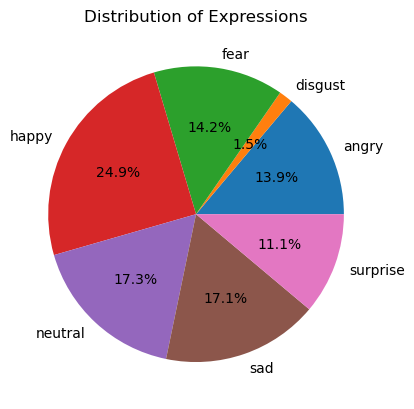

In [9]:
# Initialize a dictionary to store the number of pictures in each folder
picture_count = {}

# Loop over the expressions
for exp in expression:
    # Get the number of pictures in the current folder
    picture_count[exp] = len(os.listdir(folder_path+"train/"+exp))

# Create a bar plot
plt.bar(expression, picture_count.values())
plt.xlabel('Expression')
plt.ylabel('Number of Pictures')
plt.show()

# Create a pie chart
plt.pie(picture_count.values(), labels=expression,autopct='%1.1f%%')
plt.title('Distribution of Expressions')
plt.show()

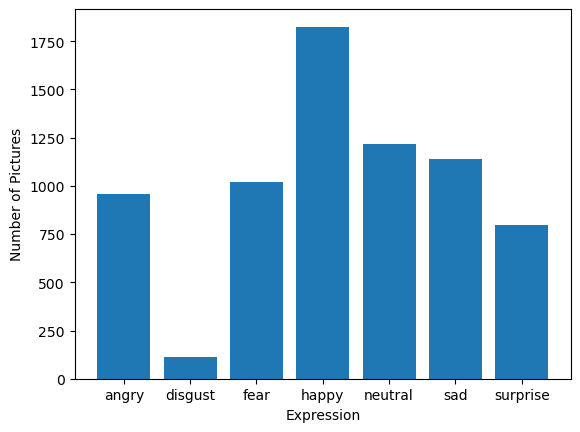

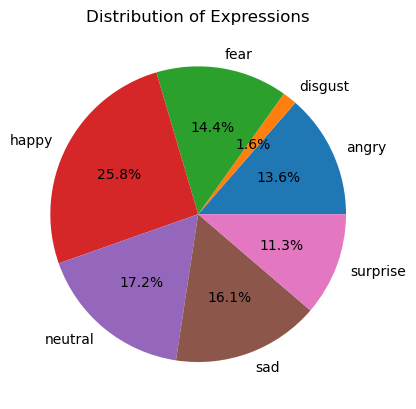

In [10]:
# Initialize a dictionary to store the number of pictures in each folder
picture_count = {}

# Loop over the expressions
for exp in expression:
    # Get the number of pictures in the current folder
    picture_count[exp] = len(os.listdir(folder_path+"validation/"+exp))

# Create a bar plot
plt.bar(expression, picture_count.values())
plt.xlabel('Expression')
plt.ylabel('Number of Pictures')
plt.show()

# Create a pie chart
plt.pie(picture_count.values(), labels=expression,autopct='%1.1f%%')
plt.title('Distribution of Expressions')
plt.show()

In [11]:
datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.3,
    horizontal_flip=True,
    rotation_range=45,
    shear_range=0.2,
    brightness_range=(0.5, 1.5),
)
train_set = datagen.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=64,
                                              class_mode='categorical',
                                              shuffle=True)
test_set = datagen.flow_from_directory(folder_path+"validation",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=64,
                                              class_mode='categorical',
                                              shuffle=True)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [12]:
model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))
model.compile(optimizer=Adam(learning_rate=0.0005),
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

In [14]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 48

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [17]:
history = model.fit(x=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

Epoch 1/48
450/450 [==============================] - 243s 541ms/step - loss: 1.8858 - accuracy: 0.2396 - val_loss: 1.7687 - val_accuracy: 0.2703 - lr: 0.0010
Epoch 2/48
450/450 [==============================] - 56s 125ms/step - loss: 1.7364 - accuracy: 0.3063 - val_loss: 1.6768 - val_accuracy: 0.3385 - lr: 0.0010
Epoch 3/48
450/450 [==============================] - 56s 125ms/step - loss: 1.6050 - accuracy: 0.3696 - val_loss: 1.5559 - val_accuracy: 0.4010 - lr: 0.0010
Epoch 4/48
450/450 [==============================] - 55s 121ms/step - loss: 1.5168 - accuracy: 0.4115 - val_loss: 1.5058 - val_accuracy: 0.4183 - lr: 0.0010
Epoch 5/48
450/450 [==============================] - 55s 123ms/step - loss: 1.4543 - accuracy: 0.4390 - val_loss: 1.4419 - val_accuracy: 0.4483 - lr: 0.0010
Epoch 6/48
450/450 [==============================] - 66s 147ms/step - loss: 1.4097 - accuracy: 0.4561 - val_loss: 1.4448 - val_accuracy: 0.4381 - lr: 0.0010
Epoch 7/48
450/450 [==============================]

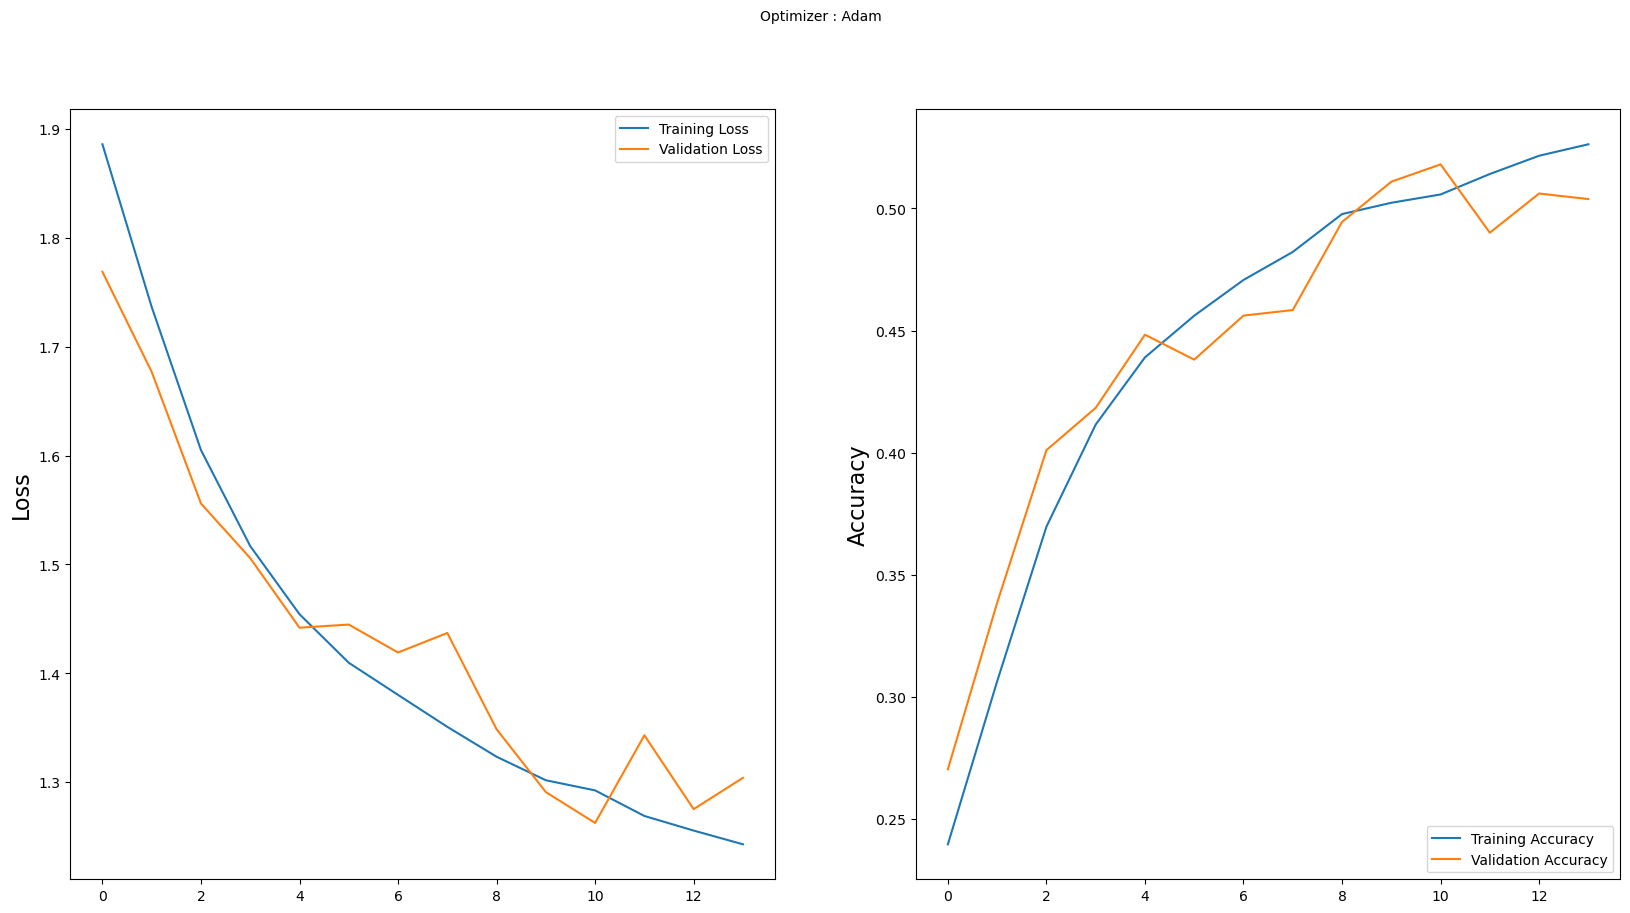

In [18]:


plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

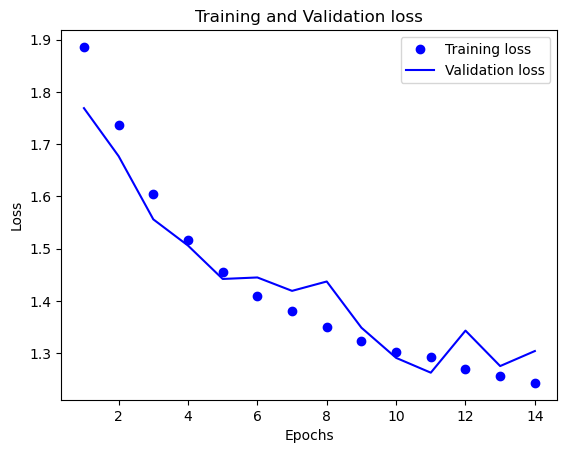

In [19]:
#plot the train and validation loss
train_loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(train_loss)+1)
plt.plot(epochs,train_loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

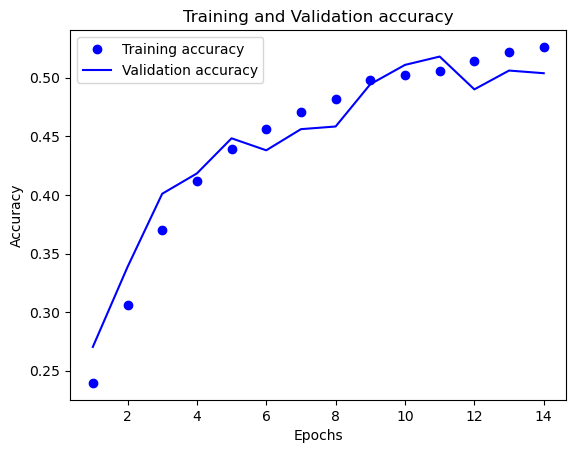

In [20]:
#plot the train and validation accuracy
train_acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
plt.plot(epochs,train_acc,'bo',label='Training accuracy')
plt.plot(epochs,val_acc,'b',label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

111/111 [==============================] - 11s 95ms/step


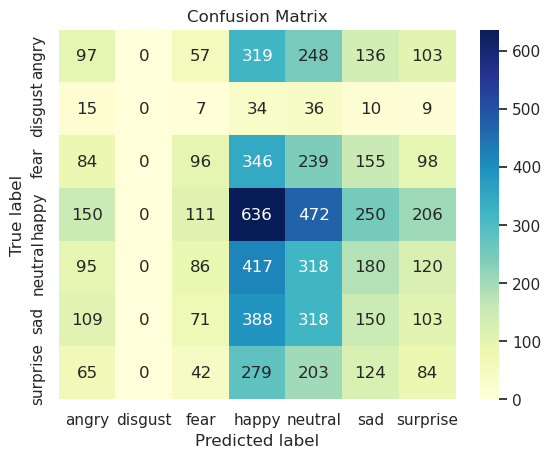

In [24]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Get the true labels and predicted labels for the validation set
validation_labels=test_set.classes
validation_pred_probs=model.predict(test_set)
validation_pred_labels=np.argmax(validation_pred_probs,axis=1)

#compute the confusion matrix
cm=confusion_matrix(validation_labels,validation_pred_labels)
class_names=list(train_set.class_indices.keys())
sns.set()
sns.heatmap(cm,annot=True,fmt='d',cmap='YlGnBu',
            xticklabels=class_names,yticklabels=class_names)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [25]:
label_dict={0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Neutral',5:'Sad',6:'Surprise'}


In [29]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array
def prediction(url):
    img=plt.imread(url)
    plt.imshow(img)
    data=img_to_array(img)
    data=data/255
    data=tf.image.resize(data,(48,48))
    samples=np.expand_dims(data,0)
    samples=np.resize(samples,(1,48,48,1))
    result=model.predict(samples)
    result=list(result[0])
    print(result)
    predictions=label_dict[np.argmax(result)]
    return predictions

1/1 [==============================] - 0s 21ms/step
[0.27845666, 0.0040742476, 0.3164913, 0.0035226333, 0.20798329, 0.17973374, 0.009738141]


'Fear'

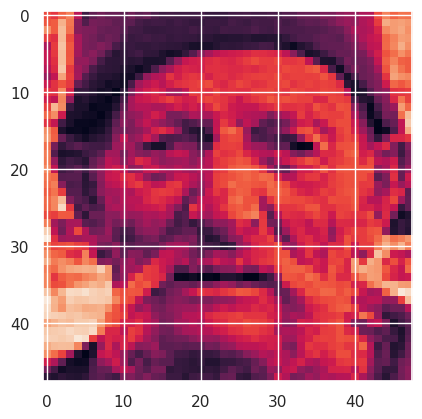

In [36]:
prediction('/kaggle/input/face-expression-recognition-dataset/images/validation/neutral/10346.jpg')


1/1 [==============================] - 0s 42ms/step
[0.132382, 0.0058264155, 0.35278204, 0.042160537, 0.24398065, 0.097490095, 0.12537827]


'Fear'

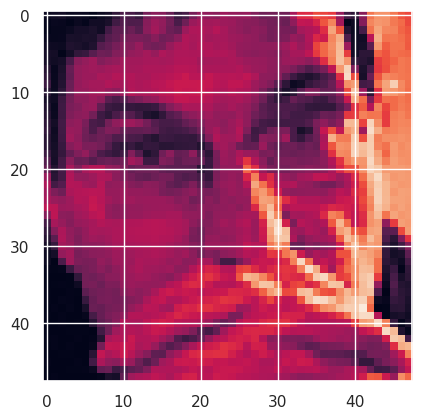

In [39]:
prediction('/kaggle/input/face-expression-recognition-dataset/images/validation/fear/10099.jpg')

1/1 [==============================] - 0s 21ms/step
[0.25887755, 0.019141654, 0.092828944, 0.008784964, 0.5640645, 0.054407757, 0.0018946228]


'Neutral'

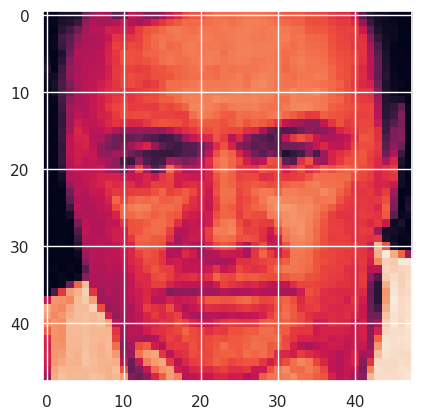

In [41]:
prediction('/kaggle/input/face-expression-recognition-dataset/images/validation/fear/10292.jpg')

1/1 [==============================] - 0s 20ms/step
[0.033129945, 0.00017597288, 0.1396667, 0.13686171, 0.0036610586, 0.0019255294, 0.68457913]


'Surprise'

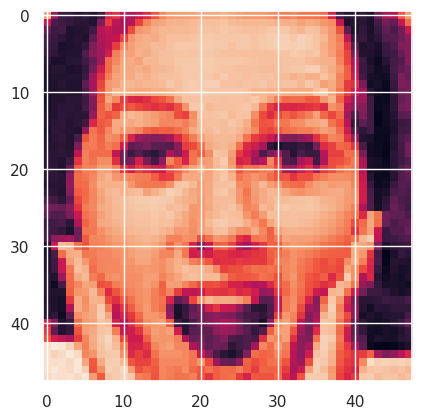

In [42]:
prediction('/kaggle/input/face-expression-recognition-dataset/images/train/surprise/10011.jpg')

1/1 [==============================] - 0s 22ms/step
[0.18271141, 0.013379726, 0.12581357, 0.021835798, 0.3282621, 0.32569522, 0.0023022057]


'Neutral'

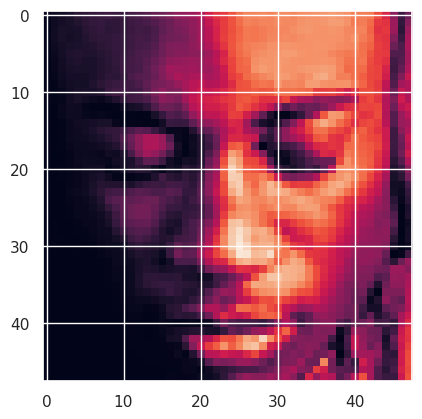

In [43]:
prediction('/kaggle/input/face-expression-recognition-dataset/images/validation/sad/10339.jpg')

1/1 [==============================] - 0s 19ms/step
[0.23718111, 0.037397195, 0.1278862, 0.061323527, 0.214438, 0.32083, 0.0009439749]


'Sad'

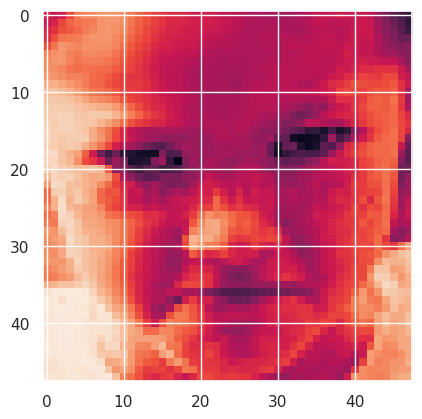

In [44]:
prediction('/kaggle/input/face-expression-recognition-dataset/images/validation/angry/1024.jpg')